<a href="https://colab.research.google.com/github/Malmiquer/Deploy-Aplication/blob/main/Projeto_classificacao_defeitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação de defeitos em Chapas de Aço Inox**




In [90]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

##1. **Preparação Inicial**

### Importando as Bibliotecas necessárias para o desenvolvimento do projeto

In [34]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, hamming_loss

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE





##2. **Verificação da Base de Dados**



### Carregamento dos Dados de Entrada

In [35]:
df_train = pd.read_csv('/content/bootcamp_train - bootcamp_train.csv')

In [36]:
df_test = pd.read_csv('/content/bootcamp_test - bootcamp_test.csv')

In [37]:
print(df_train.shape)

(3390, 39)


In [38]:
print(df_test.shape)

(389, 32)


In [39]:
df_train.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,FALSE,0,False,FALSE,não,False,Sim
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,FALSE,FALSE,False,TRUE,Não,False,Não
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,FALSE,FALSE,True,FALSE,não,False,Não
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,FALSE,FALSE,True,FALSE,não,False,Não
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,FALSE,TRUE,False,FALSE,Não,False,Não


In [40]:
df_test.head()

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_variacao_x,indice_de_variacao_y,indice_global_externo,log_das_areas,log_indice_x,log_indice_y,indice_de_orientaçao,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade
0,3390,1117,1154,1194359,1194414,100,1055,69,56,110262,...,0.057686,-0.133439,1.0,3.0233,1.5682,1.7404,0.3273,-0.1835,1.0000,72
1,3391,1572,1610,337559,337645,100,1570,176,128,128770,...,-0.640601,0.166042,1.0,3.1959,1.5798,1.9345,0.5581,-0.3592,1.0000,29
2,3392,1617,1628,2095494,2095507,100,89,14,13,7804,...,0.358265,0.598848,1.0,1.9494,1.0414,1.1139,0.1539,-0.3150,0.2570,77
3,3393,1317,1324,2166062,2166078,100,78,12,16,9381,...,-0.094189,-0.078787,1.0,1.8921,0.8451,1.2041,0.5625,-0.0604,0.2195,110
4,3394,386,394,1304617,1304626,100,51,10,9,5795,...,-0.017035,0.382024,1.0,1.7076,0.9031,0.9542,0.1111,-0.1123,0.1773,100


### Verificação dos valores nulos

In [41]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3390 non-null   int64  
 1   x_minimo                      3390 non-null   int64  
 2   x_maximo                      3334 non-null   float64
 3   y_minimo                      3390 non-null   int64  
 4   y_maximo                      3390 non-null   int64  
 5   peso_da_placa                 3390 non-null   int64  
 6   area_pixels                   3390 non-null   int64  
 7   perimetro_x                   3390 non-null   int64  
 8   perimetro_y                   3390 non-null   int64  
 9   soma_da_luminosidade          3290 non-null   float64
 10  maximo_da_luminosidade        3292 non-null   float64
 11  comprimento_do_transportador  3390 non-null   int64  
 12  tipo_do_aço_A300              3390 non-null   object 
 13  tip

In [42]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            389 non-null    int64  
 1   x_minimo                      389 non-null    int64  
 2   x_maximo                      389 non-null    int64  
 3   y_minimo                      389 non-null    int64  
 4   y_maximo                      389 non-null    int64  
 5   peso_da_placa                 389 non-null    int64  
 6   area_pixels                   389 non-null    int64  
 7   perimetro_x                   389 non-null    int64  
 8   perimetro_y                   389 non-null    int64  
 9   soma_da_luminosidade          389 non-null    int64  
 10  maximo_da_luminosidade        389 non-null    int64  
 11  comprimento_do_transportador  389 non-null    int64  
 12  tipo_do_aço_A300              389 non-null    int64  
 13  tipo_

In [43]:
print(df_train.isnull().sum()) #Verificando os valores nulos existentes em cada coluna

id                                0
x_minimo                          0
x_maximo                         56
y_minimo                          0
y_maximo                          0
peso_da_placa                     0
area_pixels                       0
perimetro_x                       0
perimetro_y                       0
soma_da_luminosidade            100
maximo_da_luminosidade           98
comprimento_do_transportador      0
tipo_do_aço_A300                  0
tipo_do_aço_A400                 76
espessura_da_chapa_de_aço        41
temperatura                       0
index_de_bordas                   0
index_vazio                       0
index_quadrado                   36
index_externo_x                   0
indice_de_bordas_x                0
indice_de_bordas_y                0
indice_de_variacao_x              0
indice_de_variacao_y              0
indice_global_externo            59
log_das_areas                     0
log_indice_x                      0
log_indice_y                

In [44]:
print(df_test.isnull().sum()) #Verificando os valores nulos existentes em cada coluna

id                              0
x_minimo                        0
x_maximo                        0
y_minimo                        0
y_maximo                        0
peso_da_placa                   0
area_pixels                     0
perimetro_x                     0
perimetro_y                     0
soma_da_luminosidade            0
maximo_da_luminosidade          0
comprimento_do_transportador    0
tipo_do_aço_A300                0
tipo_do_aço_A400                0
espessura_da_chapa_de_aço       0
temperatura                     0
index_de_bordas                 0
index_vazio                     0
index_quadrado                  0
index_externo_x                 0
indice_de_bordas_x              0
indice_de_bordas_y              0
indice_de_variacao_x            0
indice_de_variacao_y            0
indice_global_externo           0
log_das_areas                   0
log_indice_x                    0
log_indice_y                    0
indice_de_orientaçao            0
indice_de_lumi

##3. **Análise Exploratória dos Dados**

## A partir  dos resultados aprentados, observa-se que no modelo de treino, existem algumas colunas com valores do tipo string e boleanos, além de outras colunas que apresentam variações de valores nulos.
##Esses valores podem influenciar na análise e nos resultados obtidos. Como solução, tem-se a seguinte verificação:
  
  


---


### ⚠️  Limpeza das colunas que apresentam valores nulos;
### ⚠️  Conversão dos rótulos binários



In [48]:
#Limpeza das colunas com valores Nulos
df_train = df_train.dropna()

In [49]:
print(df_train.isnull().sum())

id                              0
x_minimo                        0
x_maximo                        0
y_minimo                        0
y_maximo                        0
peso_da_placa                   0
area_pixels                     0
perimetro_x                     0
perimetro_y                     0
soma_da_luminosidade            0
maximo_da_luminosidade          0
comprimento_do_transportador    0
tipo_do_aço_A300                0
tipo_do_aço_A400                0
espessura_da_chapa_de_aço       0
temperatura                     0
index_de_bordas                 0
index_vazio                     0
index_quadrado                  0
index_externo_x                 0
indice_de_bordas_x              0
indice_de_bordas_y              0
indice_de_variacao_x            0
indice_de_variacao_y            0
indice_global_externo           0
log_das_areas                   0
log_indice_x                    0
log_indice_y                    0
indice_de_orientaçao            0
indice_de_lumi

In [50]:
#Conversão Dos Rótulos Binários
colunas_falhas = ['falha_1', 'falha_2', 'falha_3', 'falha_4', 'falha_5', 'falha_6', 'falha_outros']
true_values = ['1', 'yes', 'sim', 'true', 'True']
false_values = ['0', 'no', 'não', 'false', 'False']

In [51]:
for col in colunas_falhas:
    df_train[col] = df_train[col].astype(str).str.lower().map(lambda x: 1 if x in true_values else 0 if x in false_values else 0)
    df_train[col] = df_train[col].astype(int)

In [52]:
df_train.head() #Verificando o resultado após o tratamento

,id,x_minimo,x_maximo,y_minimo,y_maximo,peso_da_placa,area_pixels,perimetro_x,perimetro_y,soma_da_luminosidade,...,indice_de_luminosidade,sigmoide_das_areas,minimo_da_luminosidade,falha_1,falha_2,falha_3,falha_4,falha_5,falha_6,falha_outros
0,0,154,169.0,260124,260136,100,75,27,17,9948.0,...,0.0362,0.3068,125,0,0,0,0,0,0,1
1,1,1121,-186.0,1789332,1789337,100,-206,9,-194,2240.0,...,0.0294,0.1441,115,0,0,0,1,0,0,0
2,2,41,216.0,2708878,2708939,100,6298,275,134,654634.0,...,-0.1879,1.0000,42,0,0,1,0,0,0,0
3,3,129,157.0,86408,86427,100,276,39,26,33858.0,...,-0.0416,0.8223,115,0,0,1,0,0,0,0
4,4,436,442.0,4959398,530985,100,63,17,17,6374.0,...,-0.2096,0.2083,90,0,1,0,0,0,0,0


### Verifcando o Desbalanceamento existente entre as falhas

### Verifica-se que as falhas apresentam valores desbalanceados, quando comparados

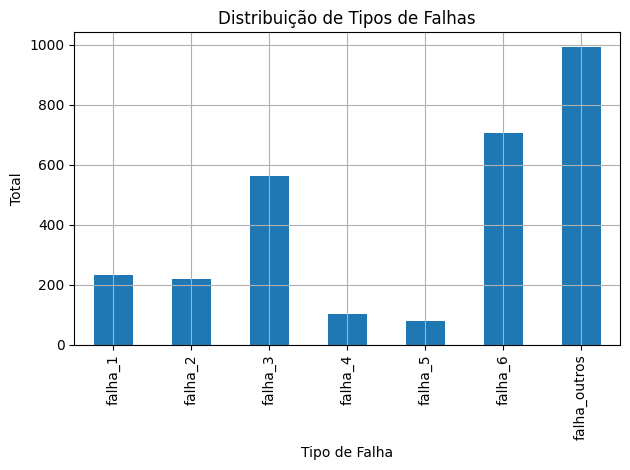

In [53]:
# Distribuição das falhas
df_train[colunas_falhas].sum().plot(kind='bar', title='Distribuição de Tipos de Falhas')
plt.xlabel('Tipo de Falha')
plt.ylabel('Total')
plt.grid(True)
plt.tight_layout()
plt.show()

### Analisando a correlação existente entre as falhas e as outras variáveis apresentadas

### Essa metrica está sendo usada principalmente para verificar a influência das variáveis umas nas outras

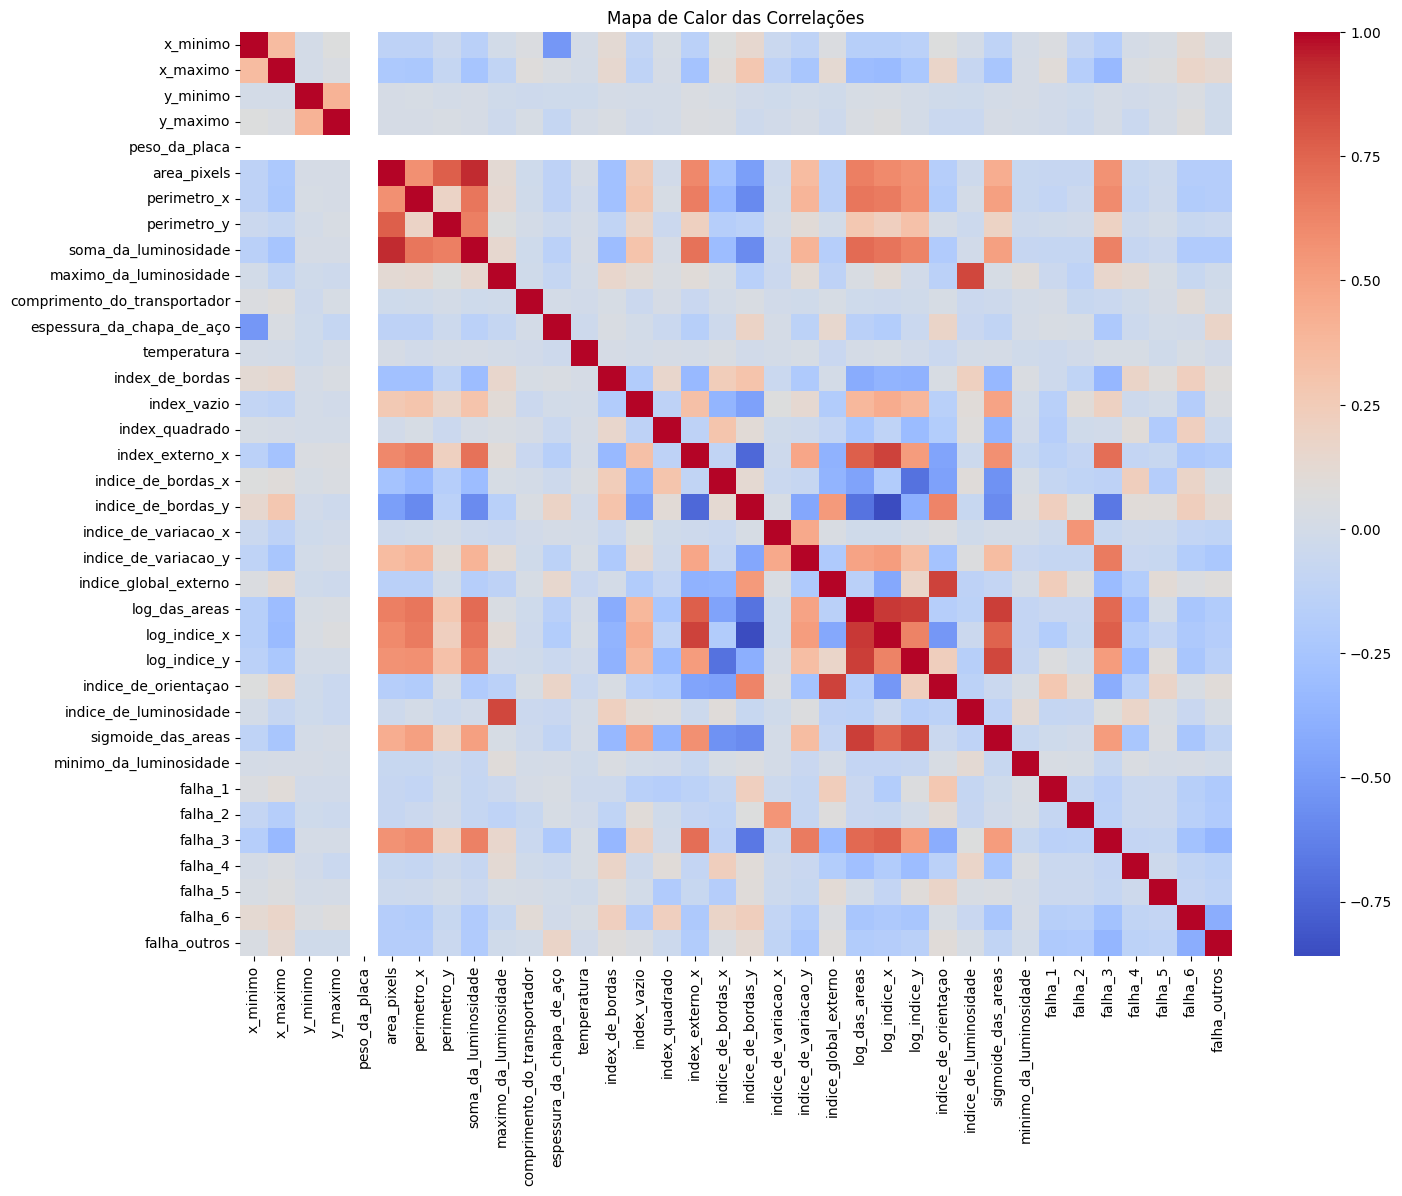

In [54]:
numerico_df = df_train.drop(columns=['id'])[df_train.drop(columns=['id']).select_dtypes(include=np.number).columns]

plt.figure(figsize=(16, 12))
sns.heatmap(numerico_df.corr(), annot=False, cmap='coolwarm')
plt.title('Mapa de Calor das Correlações')
plt.show()

## 4. **Pré-Processamento**

In [55]:
target_cols = colunas_falhas
X = df_train.drop(columns=['id'] + target_cols)
y = df_train[target_cols]

# Conversão de colunas não numéricas
for col in X.select_dtypes(exclude=np.number).columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Preencher valores nulos com a mediana
X = X.fillna(X.median())

# Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando também ao teste
X_test = df_test.drop(columns=['id'])
for col in X_test.select_dtypes(exclude=np.number).columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

X_test = X_test.fillna(X_test.median())
X_test_scaled = scaler.transform(X_test)

### Treinando o Modelo

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Modelo
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=42))

## Verificando a Aplicação

In [58]:
y_pred = model.predict(X_val)

print("\n📊 Relatório de Classificação:")
print(classification_report(y_val, y_pred, target_names=target_cols))

print("\n Métricas adicionais:")
print("Hamming Loss:", hamming_loss(y_val, y_pred))
print("F1 Score (micro):", f1_score(y_val, y_pred, average='micro'))
print("F1 Score (macro):", f1_score(y_val, y_pred, average='macro'))



📊 Relatório de Classificação:
              precision    recall  f1-score   support

     falha_1       0.50      0.07      0.12        44
     falha_2       0.95      0.80      0.87        49
     falha_3       0.92      0.92      0.92       113
     falha_4       0.72      0.72      0.72        18
     falha_5       0.50      0.07      0.12        15
     falha_6       0.67      0.37      0.48       143
falha_outros       0.64      0.43      0.52       199

   micro avg       0.76      0.51      0.61       581
   macro avg       0.70      0.48      0.53       581
weighted avg       0.72      0.51      0.58       581
 samples avg       0.51      0.51      0.51       581


 Métricas adicionais:
Hamming Loss: 0.09229258713794797
F1 Score (micro): 0.6139630390143738
F1 Score (macro): 0.5344119891438995


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### PCA e Visualização 2D

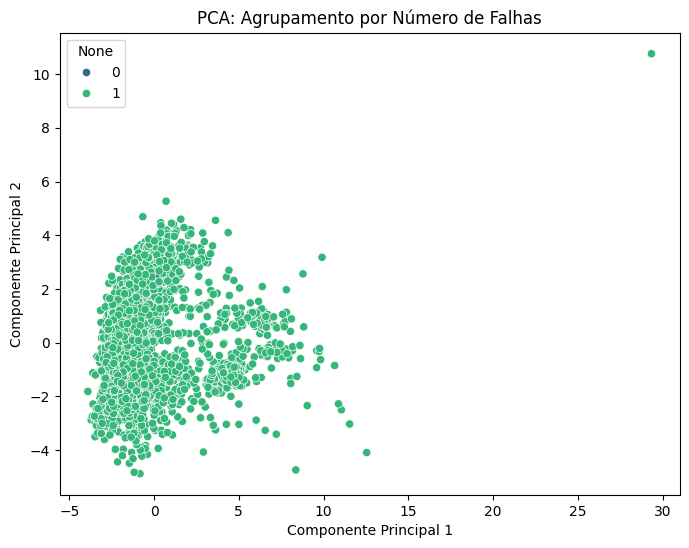

In [59]:
# Redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y.sum(axis=1), palette='viridis')
plt.title("PCA: Agrupamento por Número de Falhas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

### Predição Para o Conjunto de Teste

In [60]:
y_test_pred = model.predict(X_test_scaled)
df_predictions = pd.DataFrame(y_test_pred, columns=target_cols)
df_predictions['id'] = df_test['id']
df_predictions = df_predictions[['id'] + target_cols]

### Exportando o Resultado final

In [61]:
df_predictions.to_csv('predicoes.csv', index=False)

from google.colab import files
files.download('predicoes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>